In [ ]:
import pandas as pd
import numpy as np
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
country_original = pd.read_csv('/content/drive/MyDrive/colab/country.csv')
country = country_original.copy()

In [ ]:
countries_selected = country.iloc[:,1:]

In [ ]:
scaler = StandardScaler()

In [ ]:
countries = scaler.fit_transform(countries_selected)
countries_scaled = pd.DataFrame(countries, columns=countries_selected.columns )

In [ ]:
countries_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


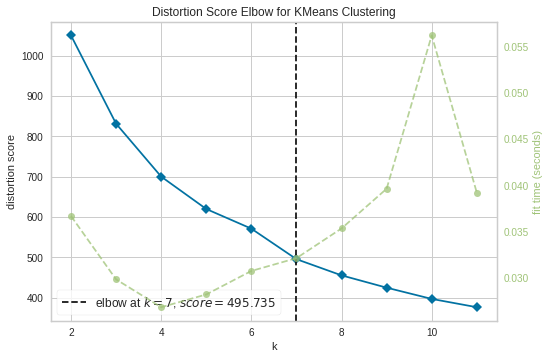

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(countries_scaled) 
visualizer.show()

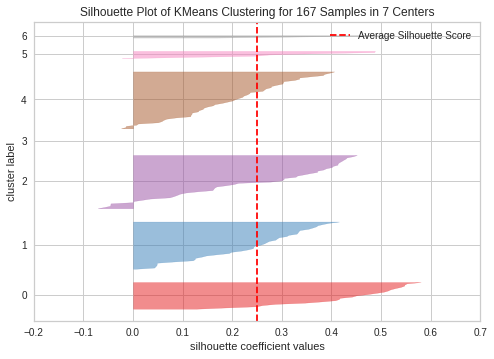

In [ ]:
model = KMeans(7)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(countries_scaled) 
visualizer.show()

In [ ]:
model = KMeans(7)
clusters = model.fit_predict(countries_scaled)

In [ ]:
clusters

array([3, 1, 0, 3, 1, 0, 0, 2, 2, 0, 1, 1, 0, 1, 1, 2, 1, 3, 1, 0, 1, 6,
       0, 2, 1, 3, 6, 1, 3, 2, 1, 3, 3, 1, 0, 0, 3, 3, 3, 1, 3, 1, 1, 1,
       2, 0, 0, 0, 1, 3, 3, 1, 1, 2, 2, 3, 3, 1, 2, 3, 2, 1, 0, 3, 6, 1,
       6, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 3, 6, 2, 1, 3, 1, 1, 6,
       6, 0, 1, 4, 1, 3, 3, 1, 1, 3, 4, 3, 1, 6, 1, 0, 1, 0, 3, 0, 6, 0,
       2, 2, 3, 5, 2, 0, 3, 1, 1, 0, 0, 1, 2, 2, 1, 0, 6, 0, 0, 3, 1, 1,
       6, 4, 1, 1, 6, 6, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 1, 3, 6, 0, 1, 0,
       0, 3, 1, 2, 2, 2, 0, 0, 0, 0, 1, 3, 3], dtype=int32)

In [ ]:
country['cluster'] = clusters

In [ ]:
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,3


In [ ]:
country.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,28.525641,30.604846,5.249487,32.301690,12147.179487,11.829128,72.030769,2.638718,5753.743590
1,14.562000,50.584000,6.915200,59.162000,15102.200000,3.876160,74.316000,1.942000,9084.320000
2,5.100000,44.848148,9.361111,37.981481,46833.333333,2.891963,80.437037,1.838519,45322.222222
3,92.693939,30.469394,5.160606,38.300000,3679.969697,11.292273,60.375758,5.288788,1782.575758
4,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
5,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000
6,86.535714,26.622857,9.945000,59.714286,3651.714286,5.877857,56.342857,4.153571,2060.500000


In [ ]:
country[country['cluster']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,3
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,3
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,3
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,3
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,3
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,3
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,3
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,3
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,3
38,"Congo, Rep.",63.9,85.10,2.46,54.7,5190,20.700,60.4,4.95,2740,3


In [ ]:
countries_scaled['cluster'] = clusters

In [ ]:
countries_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,3
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,3
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,0
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,3


In [ ]:
countries_scaled.dtypes

child_mort    float64
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp          float64
cluster         int32
dtype: object

In [ ]:
countries_scaled['target_cluster'] = countries_scaled['cluster'].map({3:1}).fillna(0).astype(int)

In [ ]:
countries_scaled['target_cluster']

0      1
1      0
2      0
3      1
4      0
      ..
162    0
163    0
164    0
165    1
166    1
Name: target_cluster, Length: 167, dtype: int64

In [ ]:
countries_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,target_cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,3,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,3,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1,0
...,...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,0,0
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0,0
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1,0
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,3,1


In [ ]:
classifier = RandomForestClassifier()

In [ ]:
X = countries_scaled.drop(['cluster','target_cluster'], axis=1)
Y = countries_scaled['target_cluster']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

In [ ]:
params = {
    'criterion'   : ['entropy', 'gini'],
    'max_depth'   : np.arange(1, 21),
    'n_estimators': [10, 50, 100, 150]  
}

In [ ]:
grid_search = GridSearchCV(
                          estimator  = classifier,
                          param_grid = params,
                          scoring    = 'accuracy',
                          cv         = 10
                          )

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'n_estimators': [10, 50, 100, 150]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 10}

In [ ]:
model_best = grid_search.best_estimator_

In [ ]:
model_best.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [ ]:
yhat = model_best.predict(x_test)

In [ ]:
accuracy_score(y_test, yhat)

0.9803921568627451

In [ ]:
model_best.feature_importances_

array([0.2695844 , 0.03685703, 0.0859949 , 0.05909718, 0.06748847,
       0.06608547, 0.05912371, 0.21935321, 0.13641562])

In [ ]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
feature_importance_df = pd.DataFrame(
                                {'feature': X.columns,
                                'importance':model_best.feature_importances_}
                                ).sort_values('importance', ascending=False)

In [ ]:
feature_importance_df

,feature,importance
0,child_mort,0.269584
7,total_fer,0.219353
8,gdpp,0.136416
2,health,0.085995
4,income,0.067488
5,inflation,0.066085
6,life_expec,0.059124
3,imports,0.059097
1,exports,0.036857


In [ ]:
feature_importance_df['feature'].head(3)

0    child_mort
7     total_fer
8          gdpp
Name: feature, dtype: object

In [ ]:
countries_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,target_cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,3,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,3,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1,0
...,...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,0,0
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,0,0
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1,0
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,3,1


In [ ]:
countries_features_selected = countries_scaled[['child_mort', 'total_fer', 'gdpp']]

In [ ]:
countries_features_selected

,child_mort,total_fer,gdpp
0,1.291532,1.902882,-0.679180
1,-0.538949,-0.859973,-0.485623
2,-0.272833,-0.038404,-0.465376
3,2.007808,2.128151,-0.516268
4,-0.695634,-0.541946,-0.041817
...,...,...,...
162,-0.225578,0.365754,-0.546913
163,-0.526514,-0.316678,0.029323
164,-0.372315,-0.661206,-0.637754
165,0.448417,1.140944,-0.637754


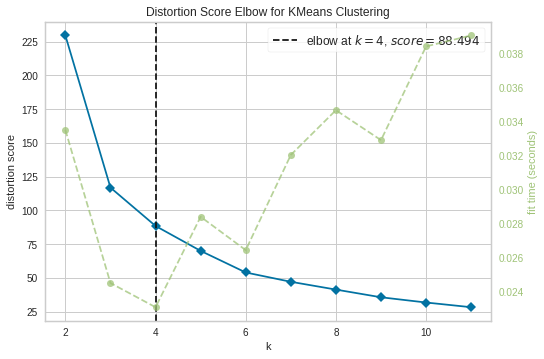

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(countries_features_selected) 
visualizer.show()

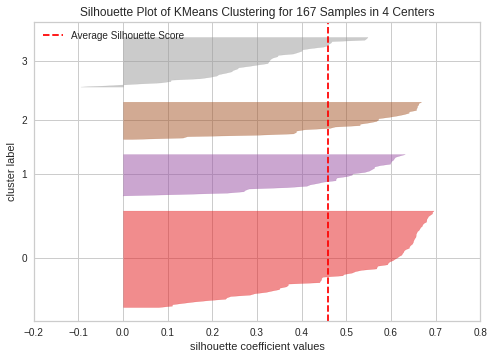

In [ ]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(countries_features_selected) 
visualizer.show()

In [ ]:
model = KMeans(4)
clusters = model.fit_predict(countries_features_selected)

In [ ]:
country['cluster_featured'] = clusters

In [ ]:
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_featured
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,3,0


In [ ]:
country.groupby('cluster_featured').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
cluster_featured,,,,,,,,,,
0,49.935135,33.396730,5.863784,47.266646,5518.378378,8.462162,65.513514,3.515135,2493.162162,2.162162
1,15.063380,45.085915,6.639296,48.853521,16351.971831,7.084225,74.618310,1.968028,9442.394366,0.732394
2,4.967857,56.575000,8.898214,47.532143,50225.000000,2.941107,80.553571,1.820357,48453.571429,2.107143
3,107.577419,27.236129,6.474839,41.364516,2957.838710,12.939839,58.238710,5.533871,1472.806452,3.645161


In [ ]:
country.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_featured
cluster,,,,,,,,,,
0,28.525641,30.604846,5.249487,32.301690,12147.179487,11.829128,72.030769,2.638718,5753.743590,0.615385
1,14.562000,50.584000,6.915200,59.162000,15102.200000,3.876160,74.316000,1.942000,9084.320000,0.920000
2,5.100000,44.848148,9.361111,37.981481,46833.333333,2.891963,80.437037,1.838519,45322.222222,1.925926
3,92.693939,30.469394,5.160606,38.300000,3679.969697,11.292273,60.375758,5.288788,1782.575758,2.181818
4,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,1.666667
5,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000,3.000000
6,86.535714,26.622857,9.945000,59.714286,3651.714286,5.877857,56.342857,4.153571,2060.500000,1.285714


In [ ]:
country[country['cluster_featured']==3].shape


(31, 12)

In [ ]:
country[country['cluster']==3].shape


(33, 12)

In [ ]:
country[country['cluster_featured']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_featured
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,3,3
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,3,3
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,3,3
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,3,3
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,6,3
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,3,3
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,3,3
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,3,3
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,3,3
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,3,3


In [ ]:
country[(country['cluster']==3) & (country['cluster_featured']!=3)]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_featured
38,"Congo, Rep.",63.9,85.10,2.46,54.7,5190,20.70,60.4,4.95,2740,3,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,3,0
55,Gabon,63.7,57.70,3.50,18.9,15400,16.60,62.9,4.08,8750,3,0
59,Ghana,74.7,29.50,5.22,45.9,3060,16.60,62.2,4.27,1310,3,0
80,Kenya,62.2,20.70,4.75,33.6,2480,2.09,62.8,4.37,967,3,0
84,Lao,78.9,35.40,4.47,49.3,3980,9.20,63.8,3.15,1140,3,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,3,0
116,Pakistan,92.1,13.50,2.20,19.4,4280,10.90,65.3,3.85,1040,3,0
165,Yemen,56.3,30.00,5.18,34.4,4480,23.60,67.5,4.67,1310,3,0


In [ ]:
country[(country['cluster']!=3) & (country['cluster_featured']==3)]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_featured
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,6,3
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,6,3
66,Haiti,208.0,15.30,6.91,64.7,1500,5.45,32.1,3.33,662,6,3
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,6,3
113,Nigeria,130.0,25.30,5.07,17.4,5150,104.00,60.5,5.84,2330,5,3
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,6,3
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,6,3
